## reports

## import libraries

##### Please import Password:

In [1]:
from notebook.auth import passwd

In [2]:
passwd()

Enter password:  ·····
Verify password:  ····


Passwords do not match.


Enter password:  ····
Verify password:  ····


'sha1:39a708b8bde1:ff10d6fc06f74a88bfb2337f4942085278ca1b9f'

In [1]:
%pylab inline
import pandas as pd
import seaborn
import numpy
import utils_pandas
%matplotlib inline
import numexpr

Populating the interactive namespace from numpy and matplotlib


## import data

In [2]:
dataraw = pd.read_excel('Data/Leaddataraw.xlsx')

## sort out

In [24]:
dataraw.front(10).head(10)

,Status_(LG),Key,Business_Activity,Program,Query_Name_(Title),Query_BD,Business_Segment,Assigned_To,Resp._Sales_Rep,Region
0,"90 - In Philos, OK",1000006,Modernization,XXX_LÖSCHEN Pilot 2011,ContractRenewal (do not delete),BAU,NaN,"Leitner, Johannes",NaN,NaN
1,"90 - In Philos, OK",1000384,Modernization,XXX_LÖSCHEN Pilot 2011,ContractRenewal (do not delete),BAU,NaN,"Leitner, Johannes",NaN,NaN
2,"90 - In Philos, OK",10000230,Modernization,XXX_LÖSCHEN Pilot 2011,ContractRenewal (do not delete),BAU,NaN,"Leitner, Johannes",NaN,NaN
3,"90 - In Philos, OK",10009797,Modernization,XXX_LÖSCHEN Pilot 2011,ContractRenewal (do not delete),BAU,NaN,"Kanbach, Helmut",NaN,NaN
4,"90 - In Philos, OK",1081459,Modernization,XXX_LÖSCHEN Pilot 2011,ContractRenewal (do not delete),BAU,NaN,"Leitner, Johannes",NaN,NaN
5,"90 - In Philos, OK",1047978,Modernization,XXX_LÖSCHEN Pilot 2011,ContractRenewal (do not delete),BAU,NaN,Franz-Josef Meurer (Z000G6TF),NaN,NaN
6,"90 - In Philos, OK",1088789,Modernization,XXX_LÖSCHEN Pilot 2011,ContractRenewal (do not delete),BAU,NaN,"Leitner, Johannes",NaN,NaN
7,"90 - In Philos, OK",1088789,Modernization,XXX_LÖSCHEN Pilot 2011,ContractRenewal (do not delete),BAU,NaN,"Leitner, Johannes",NaN,NaN
8,"90 - In Philos, OK",NaN,Modernization,XXX_LÖSCHEN Pilot 2011,ContractRenewal (do not delete),BAU,NaN,"Leitner, Johannes",NaN,NaN
9,"90 - In Philos, OK",NaN,General Analysis,Training MTE,test Hannes 4,BAU,NaN,"Bremer, Michael",NaN,NaN


## select columns

In [25]:
data = dataraw
data.columns =[column.replace(" ", "_") for column in data.columns] 
data = dataraw[['Opportunity_Type','Business_Activity','Sales_Phase','Key']]
data.head(10)

,Opportunity_Type,Business_Activity,Sales_Phase,Key
0,NaN,Modernization,NaN,1000006
1,NaN,Modernization,NaN,1000384
2,NaN,Modernization,Closed/Lost,10000230
3,NaN,Modernization,NaN,10009797
4,NaN,Modernization,2 Bid Preparation,1081459
5,NaN,Modernization,NaN,1047978
6,NaN,Modernization,NaN,1088789
7,NaN,Modernization,NaN,1088789
8,NaN,Modernization,Closed/Lost,NaN
9,NaN,General Analysis,NaN,NaN


## remove NaN values

In [26]:
datacrisp = data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
datacrisp.head(10)

,Opportunity_Type,Business_Activity,Sales_Phase,Key
11,Service,Modernization,Closed/Lost,10000591
12,Service,Modernization,Closed/Cancelled,1055780
13,Service,Modernization,Closed/Won,1064656
14,Service,Modernization,Closed/Won,1057663
15,Service,Modernization,Closed/Cancelled,4054531
16,Service,Modernization,Closed/Lost,1057008
17,Service,Modernization,Closed/Won,1062736
18,Service,Modernization,Closed/Lost,4001014
19,Service,Modernization,Closed/Lost,4001698
20,Service,Modernization,Closed/Lost,4002575


## sort out stuff

In [35]:
datanice = datacrisp.replace(to_replace='Closed/',value='',regex=True)
datanice = datanice.replace(to_replace='Cancelled',value='Lost',regex=True)
datanice = datanice.query('Sales_Phase == ["Won","Lost"]')
datanice.head()



,Opportunity_Type,Business_Activity,Sales_Phase,Key
11,Service,Modernization,Lost,10000591
12,Service,Modernization,Lost,1055780
13,Service,Modernization,Won,1064656
14,Service,Modernization,Won,1057663
15,Service,Modernization,Lost,4054531


In [36]:
pivotS = pd.pivot_table(datanice,values='Key',index=['Opportunity_Type','Business_Activity'],columns=['Sales_Phase'],aggfunc='count',fill_value=0,margins=1)
pivotS


Sales_Phase                         Lost   Won   All
Opportunity_Type Business_Activity                  
Product          Modernization         2     0     2
Service          Contract Sales     1708   362  2070
                 General Analysis     13     5    18
                 Modernization      2430   711  3141
Solution         Contract Sales       31     1    32
                 General Analysis      1     2     3
                 Modernization       920   507  1427
System           Modernization         8     5    13
All                                 5113  1593  6706

In [37]:
pivot=pivotS.drop('All').drop('All', axis=1)
pivot=pivot.stack().unstack()
pivot


/Users/lukaspellegrini/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Sales_Phase                         Lost  Won
Opportunity_Type Business_Activity           
Product          Modernization         2    0
Service          Modernization      2430  711
                 Contract Sales     1708  362
                 General Analysis     13    5
Solution         Modernization       920  507
                 Contract Sales       31    1
                 General Analysis      1    2
System           Modernization         8    5

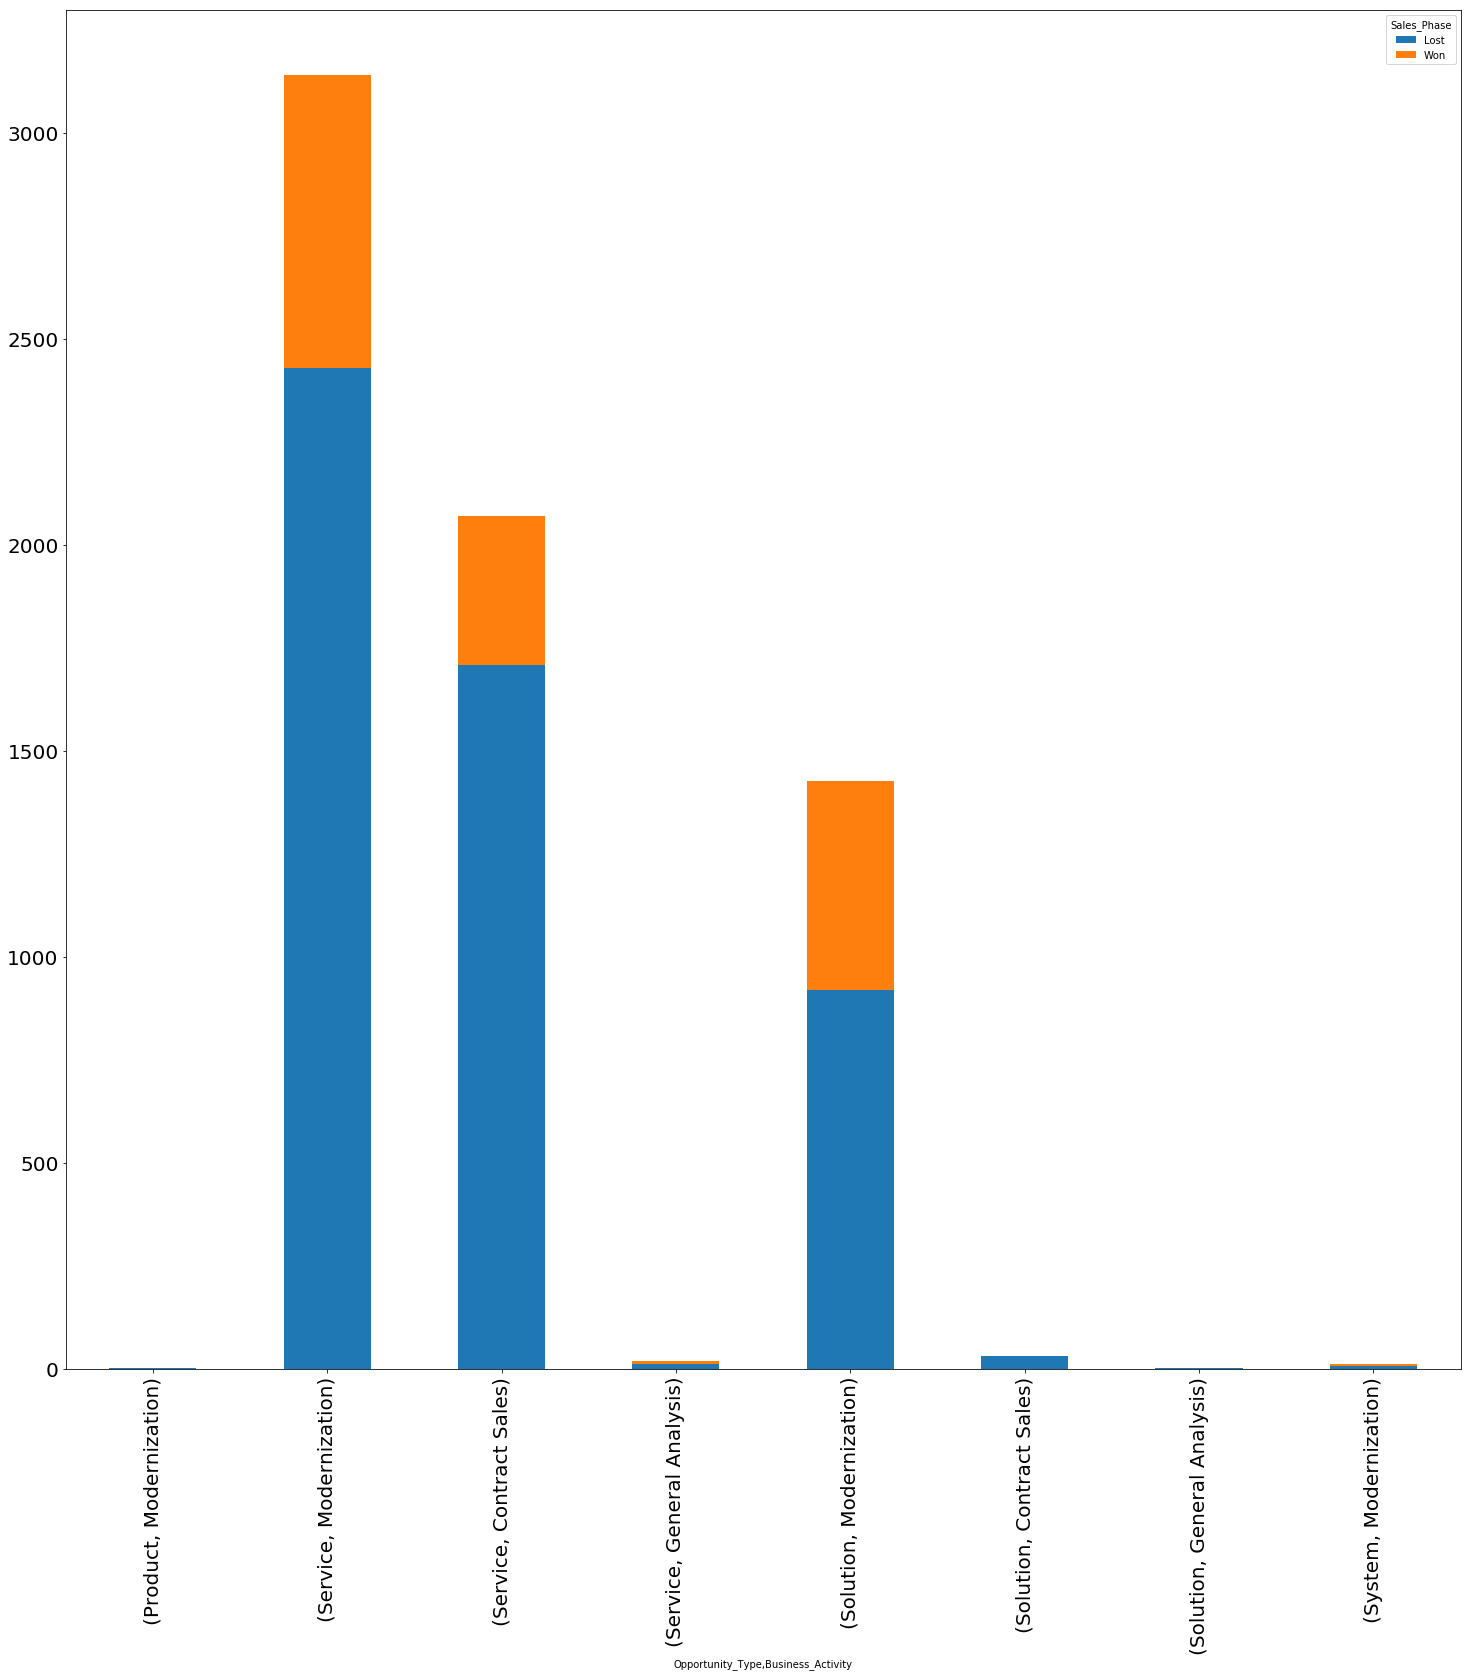

In [45]:
pivot.plot(kind='bar',figsize=(25,25),grid=0,legend=1,stacked=1,fontsize=20)